# PRODIGY INFOTECH

# TASK DONE BY :- YESHASWINI. P. V

PROBLEM STATEMENT

Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.

Sample Dataset :-
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## LOADING THE DATASET

In [2]:
df = pd.read_csv('bank-additional.csv',delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
# displaying first 5 rows
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
# displaying last 5 rows
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no


## BASIC UNDERSTANDING OF THE DATASET

In [5]:
# showing dimensions of the dataset
df.shape

(4119, 21)

In [6]:
#showing size of dataset
df.size

86499

In [7]:
# showing column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [8]:
# checking data types
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [9]:
# checking for different data types
df.dtypes.value_counts()

object     11
int64       5
float64     5
dtype: int64

In [10]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [11]:
#showing statistical summary of the dataset
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
#transposes the summary statistics generated by the describe()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


## DATA CLEANING AND PREPROCESSING

## Checking null values

In [13]:
#Returns True or False based on presence of null values for first dataset
df.isnull() 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
#checks for null values and returns a count of non-null and null values for each column in the df
df.isnull().value_counts() 

age    job    marital  education  default  housing  loan   contact  month  day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  deposit
False  False  False    False      False    False    False  False    False  False        False     False     False  False     False     False         False           False          False      False        False      4119
dtype: int64

In [15]:
#computes the sum of null values for each column in the DataFrame df
df.isnull().sum() 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

The second dataset has no null values, as indicated above by the absence of missing values .

## Checking duplicate values

In [16]:
#checks for duplicate rows in the DataFrame df
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4114    False
4115    False
4116    False
4117    False
4118    False
Length: 4119, dtype: bool

In [17]:
#computes and returns the count of duplicate and unique rows in DataFrame df
df.duplicated().value_counts()

False    4119
dtype: int64

In [18]:
#calculates the total count of duplicate rows in the DataFrame df.
df.duplicated().sum()

0

From the above information we can conclude that -

1.The dataset has 21 columns and 4119 rows.

2.The dataset has 11 categorical columns.

3.The dataset has 10 numerical columns.

4.The dataset has no null values and duplicate values.

## Extracting Numerical and Categorical Columns

In [19]:
#Categorial columns
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
#Numerical columns
num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


## Descriptive Statistical Analysis

In [20]:
# For Numerical Columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
# For Categorical columns
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,1012,2509,1264,3315,2175,3349,2652,1378,860,3523,3668


## DATA VISUALIZATION

## Visualizing Numerical columns using Histplot

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>],
       [<AxesSubplot:title={'center':'pdays'}>,
        <AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'emp.var.rate'}>],
       [<AxesSubplot:title={'center':'cons.price.idx'}>,
        <AxesSubplot:title={'center':'cons.conf.idx'}>,
        <AxesSubplot:title={'center':'euribor3m'}>],
       [<AxesSubplot:title={'center':'nr.employed'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

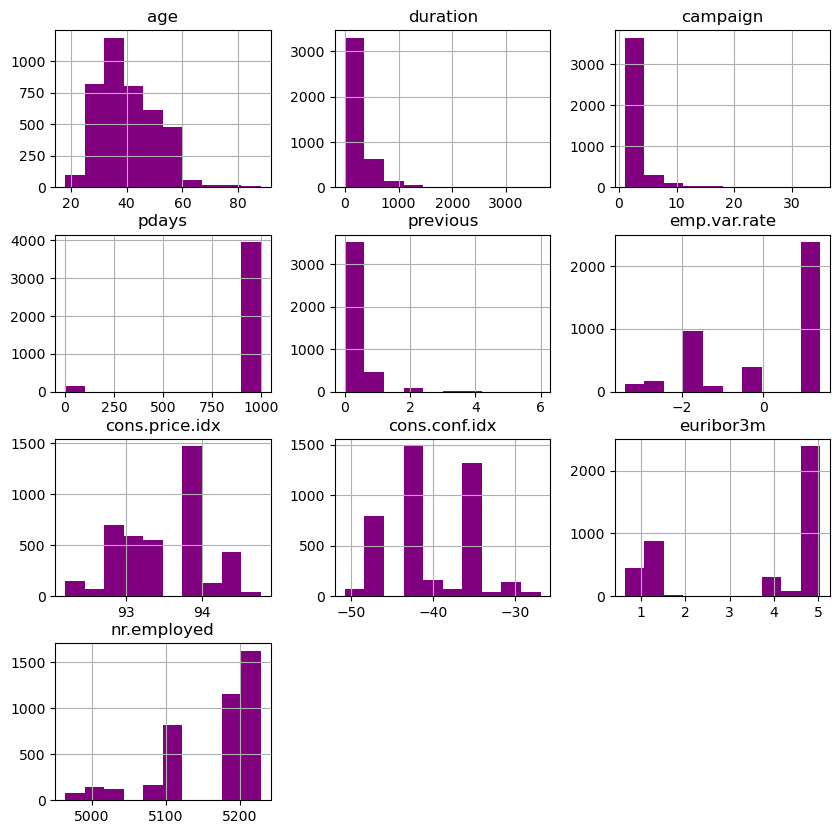

In [22]:
#Histplot for visualizing Numerical columns
df.hist(figsize=(10,10),color='purple')

## Pairplot for visualization of numerical attributes age,duration,campaign,pdays,previous

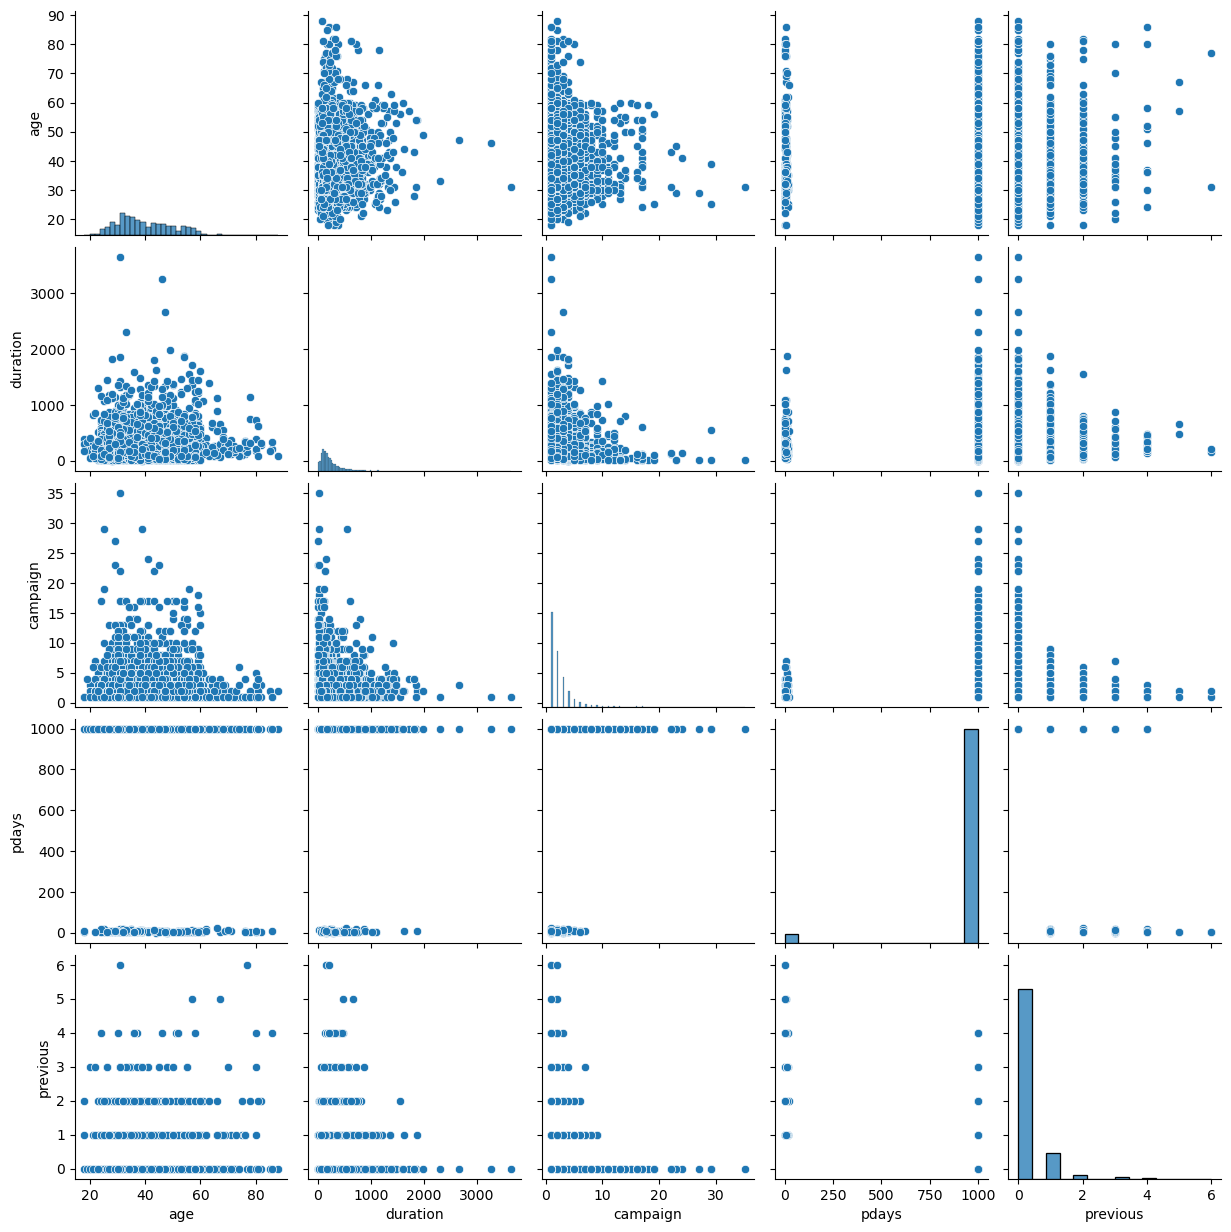

In [23]:
selected_columns = ['age','duration','campaign','pdays','previous']

# Create pairplot for selected columns of numerical types
sns.pairplot(df[selected_columns])

In the pairplot below, I have included the following important numerical attributes :-
    
1.age: Represents the age of the bank clients (Numeric).
    
2.duration: Duration of the last contact in seconds, significantly impacting the output target (Numeric).
    
3.campaign: Number of contacts made during the current campaign for this client (Numeric).
    
4.pdays: Number of days since the client was last contacted from a previous campaign (Numeric; 999 implies no previous contact).
    
5.previous: Number of contacts made before this campaign for this client (Numeric).

## Visualizing Categorical columns using Barplot

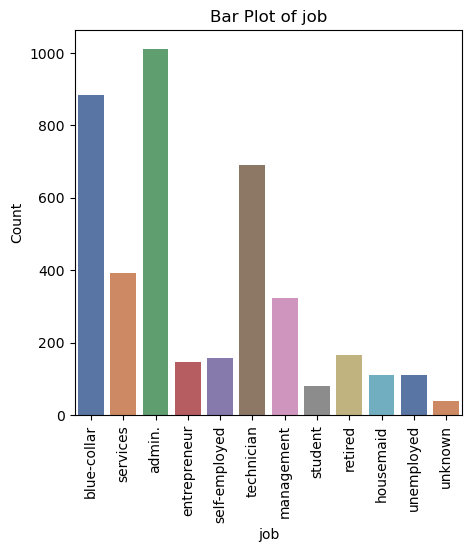

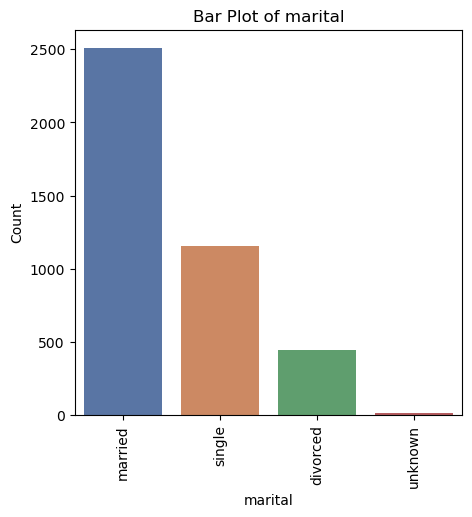

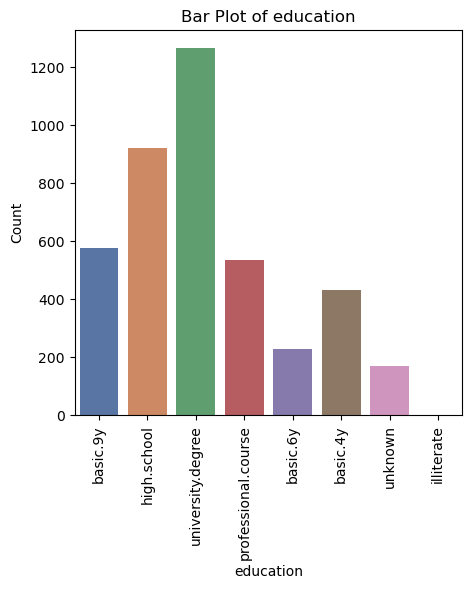

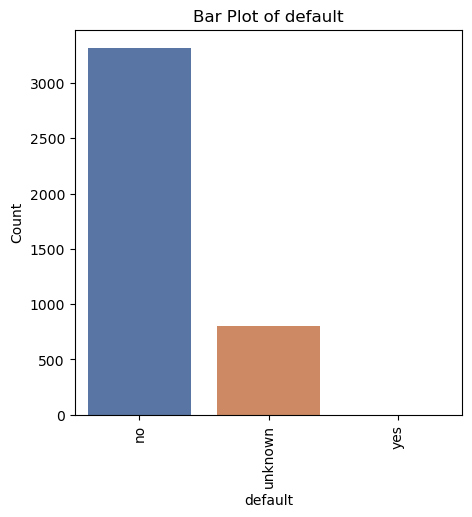

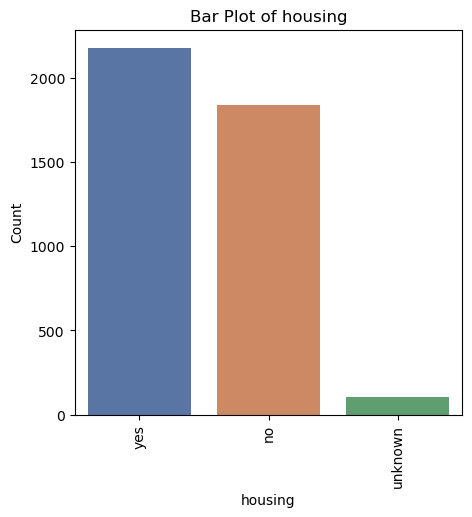

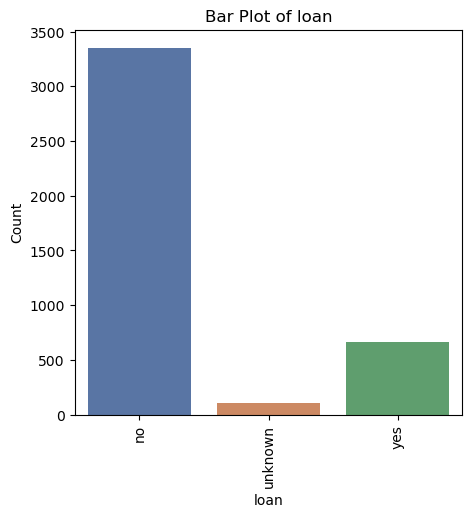

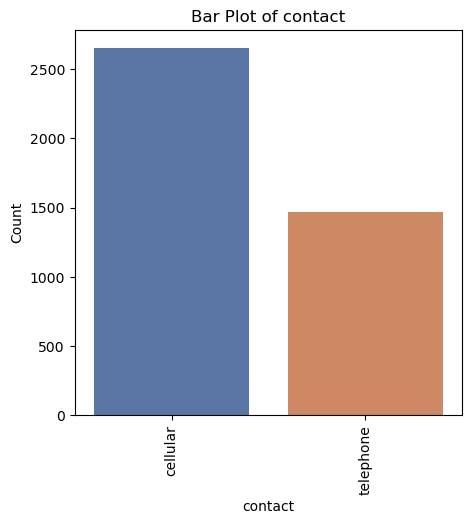

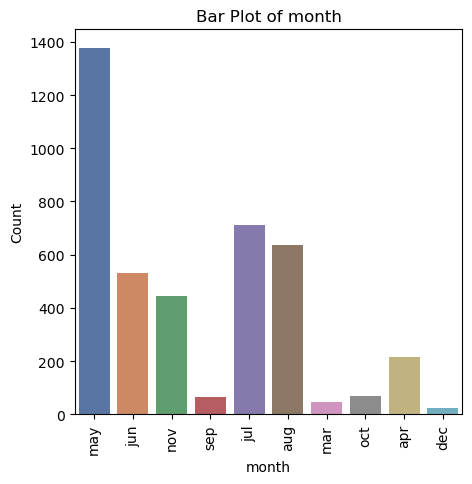

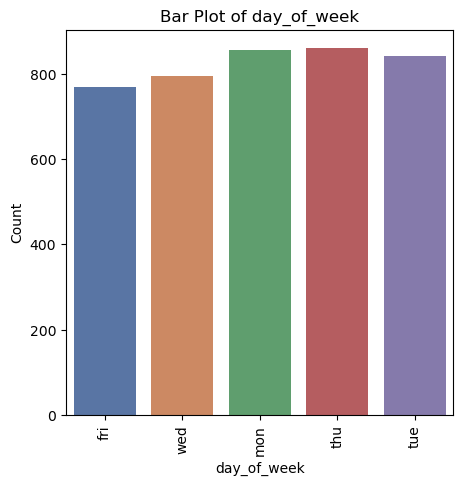

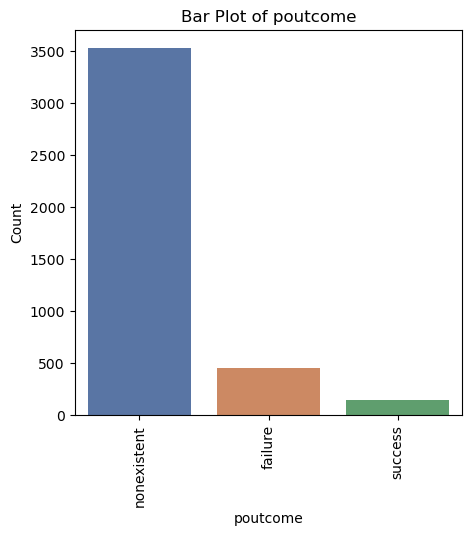

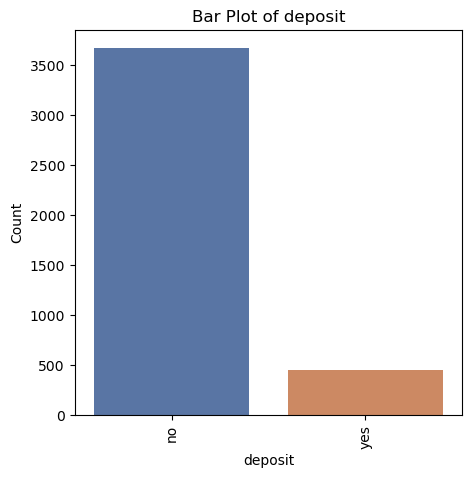

In [24]:
for feature in cat_cols:
    plt.figure(figsize=(5,5)) 
    sns.countplot(x=feature, data=df, palette='deep')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

From above plots we can gather following insights :-

1. In the Job Column, we have seen most of the clients are working as 'admin'.


2. In the Marital Column, we have seen most of the clients are married.


3. In the Education Column, we have seen most of the clients have a 'university degree'.


4. In the Default Column, we have seen most of the clients have 'no' credit as default.


5. In the Housing Column, we have seen most of the clients are taking a housing loan.


6. In the Loan Column, we have seen most of the clients are not taking a personal loan.


7. In the Contact Column, we have seen most of the clients choose cellular as the contact.


8. In the Month Column, we have seen most of the clients are contacted in the 'May' month.


9. In the Day_of_week Column, we have seen most of the clients are contacted on 'Thursday'.


10. In the Poutcome Column, we have seen the result of most of the previous marketing campaigns is 'nonexistent'.


11. In the Target Column, we have seen most of the clients are not subscribed to a term deposit.

## Plotting BoxPlot and Checking for Outliers

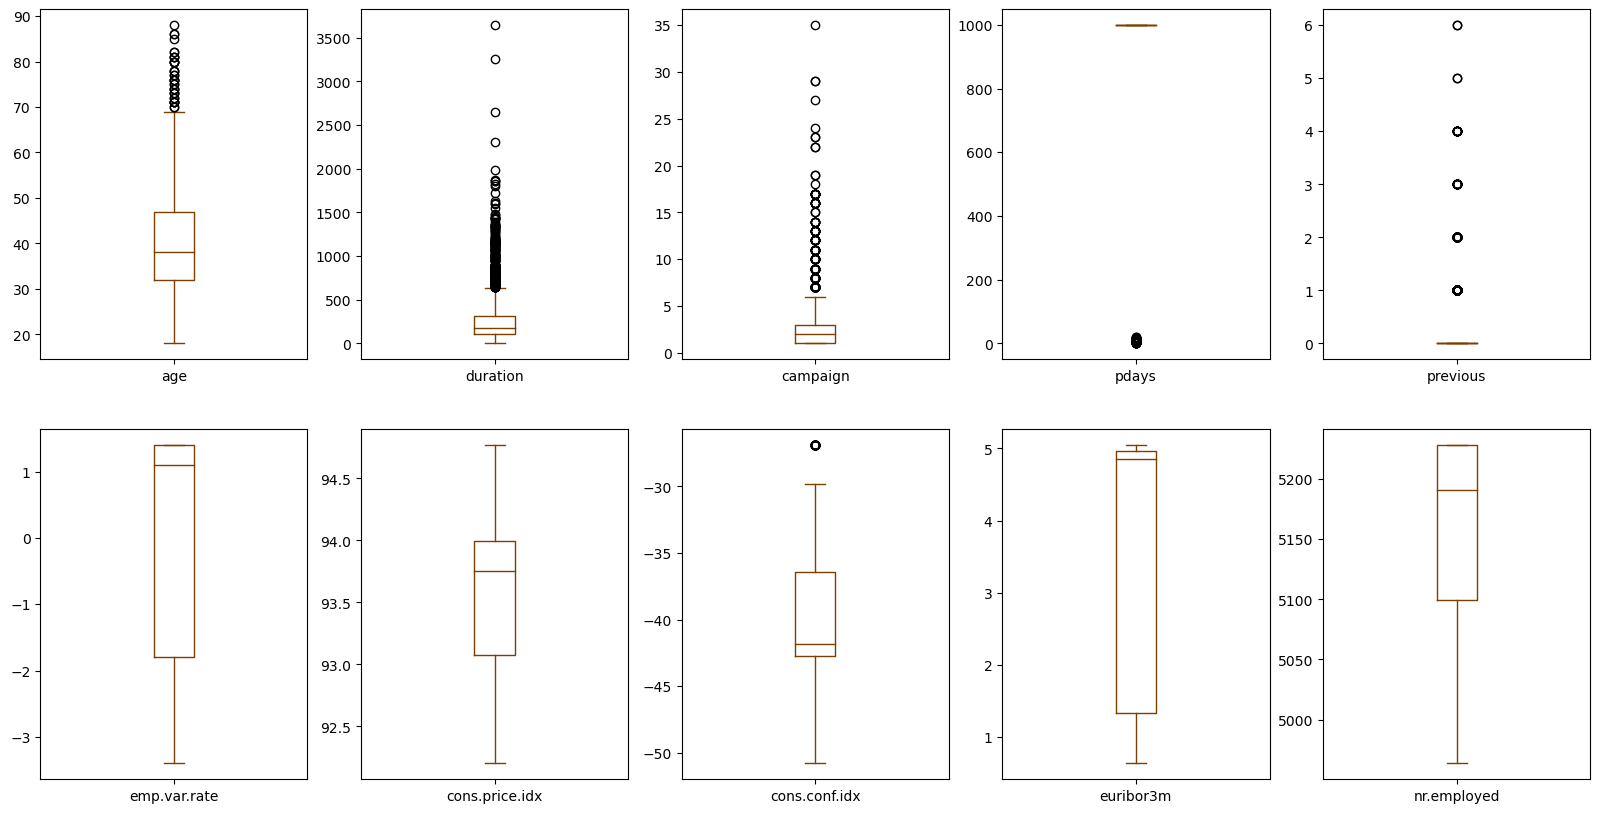

In [25]:
#Plotting BoxPlot
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#7b3f00')
plt.show()

Through this Plot we can see there are 3 columns having outliers i.e.. 'age', 'duration' and 'campaign'. So, we will remove these outliers using Interquantile Range.

In [26]:
# Removing outliers
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

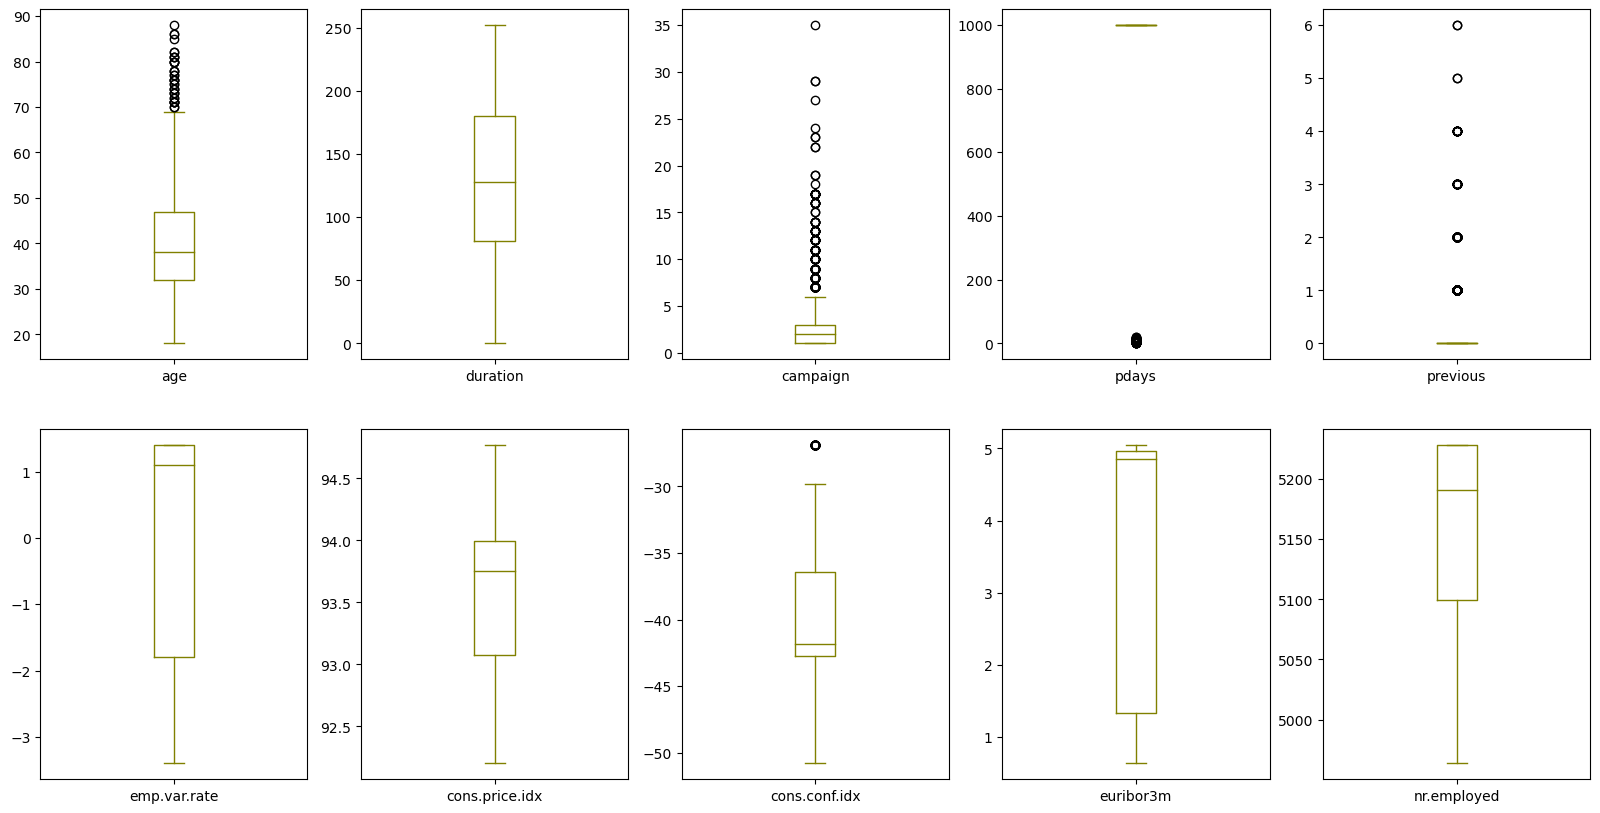

In [27]:
# Plotting boxplot after removing outliers
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#808000')
plt.show()

## Checking for correlation using Correlation Plot

In [28]:
#calculating the correlation coefficients between all pairs of numerical columns in the DataFrame df
df.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.014048,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.014048,1.000000,-0.218111,-0.093694,0.094206,-0.063870,-0.013338,0.045889,-0.067815,-0.097339
campaign,-0.014169,-0.218111,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.093694,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.094206,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.063870,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,-0.013338,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,0.045889,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.067815,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.097339,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


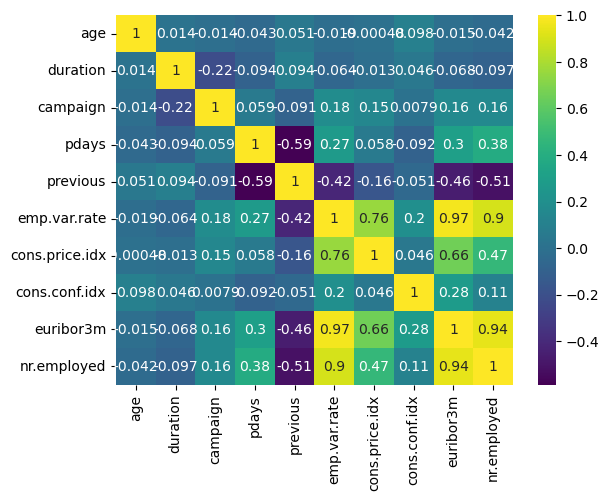

In [29]:
#Correlation Matrix for df
sns.heatmap(df.corr(),cmap='viridis',annot=True)
plt.show()

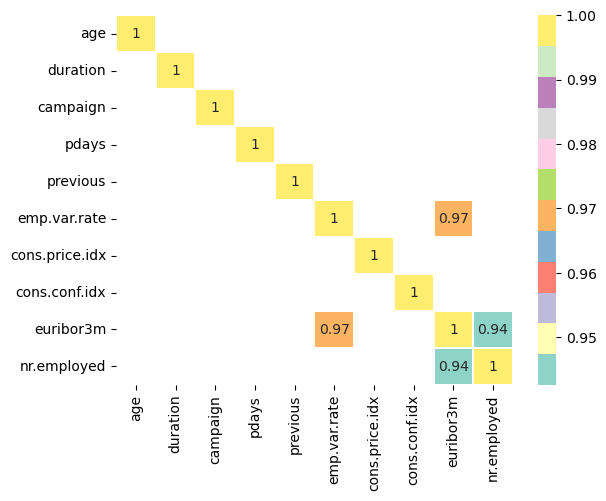

In [30]:
#Correlation Matrix for df
corr=df.corr()
corr = corr[abs(corr)>=0.90]
sns.heatmap(corr,annot=True,cmap='Set3',linewidths=0.2)
plt.show()

## Feature Selection using Correlation

In [31]:
#considering high correlation columns only
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [32]:
# copy with original dataframe
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [33]:
# Removing high correlated columns from the dataset
df1.drop(high_corr_cols,inplace=True,axis=1)  # axis=1 indicates columns
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [34]:
# showing dimensions of the updated dataset
df1.shape

(4119, 18)

Hence, df1 has 4119 rows and 18 columns.

Also, df1 does not contain high correlation columns.

## Label Encoding

In [35]:
# Conversion of categorical columns into numerical columns using label encoder.
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,250,1,20,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,250,3,20,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,20,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,20,0,1,23,8,0
4,29,0,1,6,0,2,0,0,7,1,55,0,20,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,12,0,1,1,0,2,2,0,3,2,50,0,20,0,1,17,6,0
4115,21,0,1,3,0,2,0,1,3,0,216,0,20,0,1,17,6,0
4116,9,8,2,3,0,0,0,0,6,1,61,1,20,1,0,8,4,0
4117,40,0,1,3,0,0,0,0,1,0,250,0,20,0,1,13,17,0


## Checking for Target variable

In [36]:
#counts the occurrences of each unique value in the 'deposit' column
df_encoded['deposit'].value_counts()

0    3668
1     451
Name: deposit, dtype: int64

## Selecting Independent and Dependent Variables

In [37]:
#Independent variable
x = df_encoded.drop('deposit',axis=1)  
# Dependent variable
y = df_encoded['deposit']              
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# Splitting the dataset into Train and Test datasets

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
print(4119*0.25)

1029.75


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3089, 17)
(1030, 17)
(3089,)
(1030,)


## Creating functions to compute Confusion Matrix, Classification Report, Accuracy score and to generate training and testing scores.

In [41]:
#function for Confusion Matrix, Classification Report and Accuracy score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

In [42]:
#function for generating training and testing scores.
def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  # Training Accuracy
    print('Testing Score',test_score)    # Testing Accuracy

## Decision Tree Classifier

## Decision Tree (using gini) criteria

In [43]:
# Importing  Decision Tree library
from sklearn.tree import DecisionTreeClassifier

# Building Decision Tree Classifier Model
dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [44]:
# Evaluating training and testing accuracy
mscore(dt)

Training Score 0.9148591777274199
Testing Score 0.8990291262135922


In [45]:
# Generating prediction
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 0 0 0]


In [46]:
#Evaluate the model - confusion matrix, classification Report, Accuaracy
eval_model(y_test,ypred_dt)

Accuracy_Score 0.8990291262135922
Confusion Matrix
 [[905  25]
 [ 79  21]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       930
           1       0.46      0.21      0.29       100

    accuracy                           0.90      1030
   macro avg       0.69      0.59      0.62      1030
weighted avg       0.87      0.90      0.88      1030



### Cross Validation for Decision Tree Classifier (gini)

In [47]:
#Cross Validation for Decision Tree Classifier (gini)
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the Decision Tree Classifier(gini)
scores_dt = cross_val_score(dt, x, y, cv=5)  

# Printing the cross-validation scores
print("Cross-Validation Scores (Decision Tree(gini)):", scores_dt)

# Calculating and printing the mean and standard deviation of the cross-validation scores(gini)
print(f"Mean Accuracy (Decision Tree(gini)): {scores_dt.mean():.2f}")
print(f"Standard Deviation (Decision Tree(gini)): {scores_dt.std():.2f}")


Cross-Validation Scores (Decision Tree(gini)): [0.89320388 0.89320388 0.90291262 0.89320388 0.90522479]
Mean Accuracy (Decision Tree(gini)): 0.90
Standard Deviation (Decision Tree(gini)): 0.01


## Plotting Decision Tree (gini)

In [48]:
from sklearn.tree import plot_tree

In [49]:
# cn = class names, fn = feature_names
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


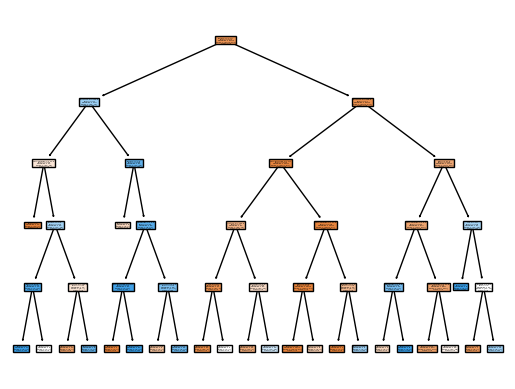

In [50]:
plot_tree(dt,feature_names=fn,class_names=cn,filled=True)
plt.show()

## Decision Tree (using entropy ) criteria

In [51]:
# Building Decision Tree Classifier Model
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [52]:
# Evaluating training and testing accuracy
mscore(dt1)

Training Score 0.9080608611201036
Testing Score 0.9048543689320389


In [53]:
# Generating prediction
ypred_dt1 = dt1.predict(x_test)

In [54]:
# Evaluate the model - confusion matrix, classification Report, Accuracy
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.9048543689320389
Confusion Matrix
 [[915  15]
 [ 83  17]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       930
           1       0.53      0.17      0.26       100

    accuracy                           0.90      1030
   macro avg       0.72      0.58      0.60      1030
weighted avg       0.88      0.90      0.88      1030



### Cross Validation for Decision Tree Classifier (entropy)

In [55]:
#Cross Validation for Decision Tree Classifier (entropy)
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the Decision Tree Classifier(entropy)
scores_dt1 = cross_val_score(dt1, x, y, cv=5)  

# Printing the cross-validation scores
print("Cross-Validation Scores (Decision Tree (entropy)):", scores_dt1)

# Calculating and printing the mean and standard deviation of the cross-validation scores(entropy)
print(f"Mean Accuracy (Decision Tree (entropy)): {scores_dt1.mean():.2f}")
print(f"Standard Deviation (Decision Tree (entropy)): {scores_dt1.std():.2f}")

Cross-Validation Scores (Decision Tree (entropy)): [0.89927184 0.89927184 0.91019417 0.89684466 0.91130012]
Mean Accuracy (Decision Tree (entropy)): 0.90
Standard Deviation (Decision Tree (entropy)): 0.01


## Plotting Decision Tree (entropy)

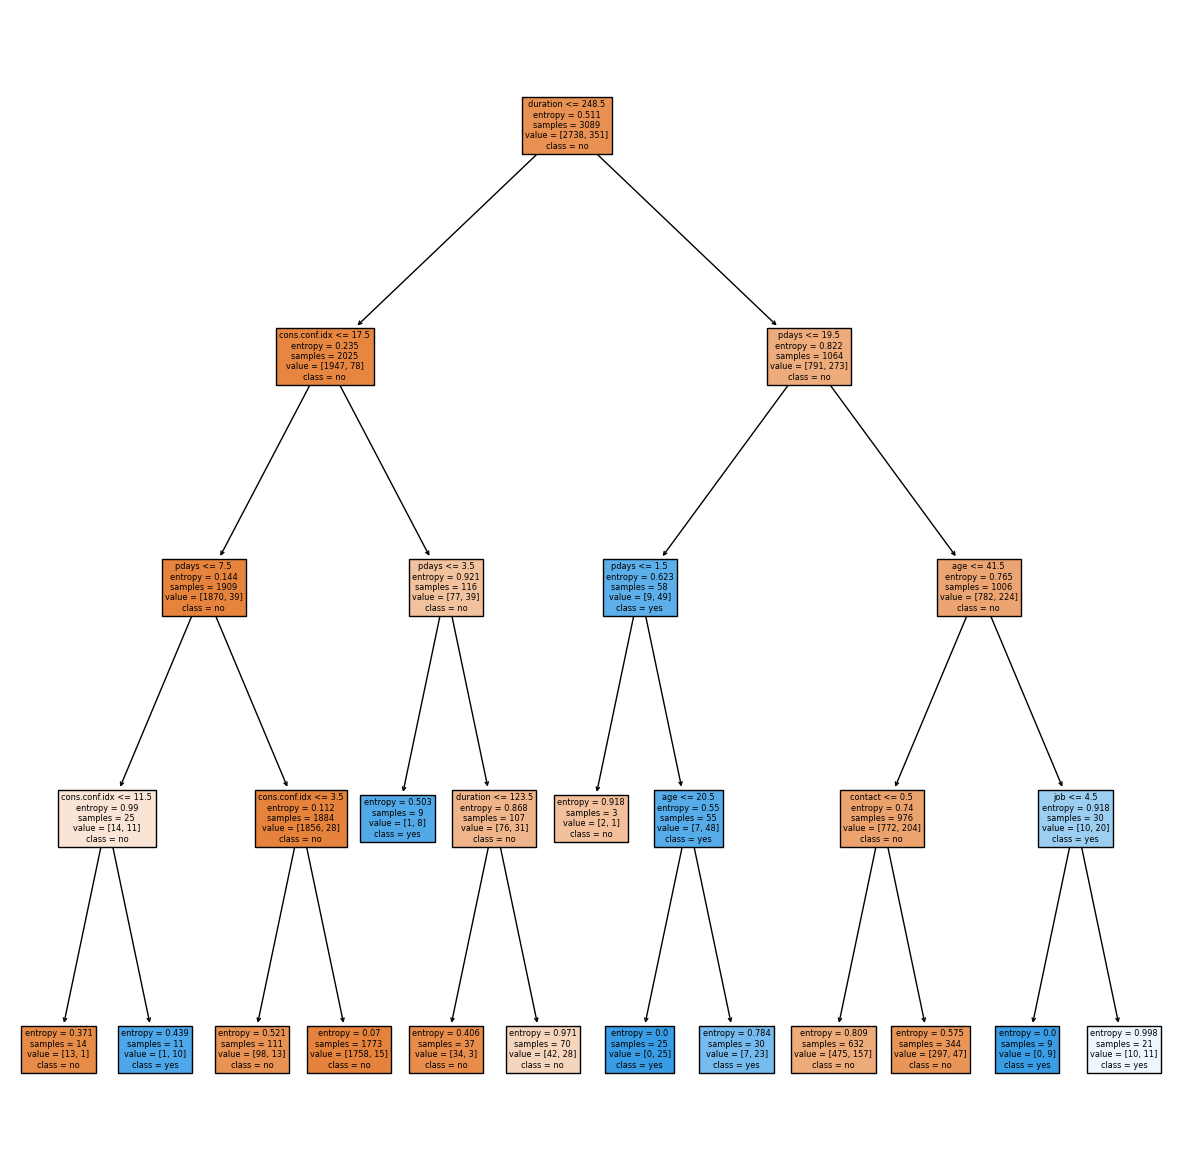

In [56]:
plt.figure(figsize=(15,15))
plot_tree(dt1,feature_names=fn,class_names=cn,filled=True)
plt.show()

## CONCLUSION

On building the model with Decision Tree Classifier we summarize following results:-
### Gini Criteria:
- **Training Score:** 0.9149
- **Testing Score:** 0.8990
- **Accuracy Score:** 0.8990
- **Mean Accuracy (from cross-validation):** 0.90
- **Confusion Matrix:**
  ```
  [[905 25]
   [79 21]]
  ```
- **Classification Report:** 
  - Precision for class 0: 0.92, class 1: 0.46
  - Recall for class 0: 0.97, class 1: 0.21
  - F1-score for class 0: 0.95, class 1: 0.29
- **Standard Deviation:** 0.00

### Entropy Criteria:
- **Training Score:** 0.9081
- **Testing Score:** 0.9049
- **Accuracy Score:** 0.9049
- **Mean Accuracy (from cross-validation):** 0.90
- **Confusion Matrix:**
  ```
  [[915 15]
   [83 17]]
  ```
- **Classification Report:** 
  - Precision for class 0: 0.92, class 1: 0.53
  - Recall for class 0: 0.98, class 1: 0.17
  - F1-score for class 0: 0.95, class 1: 0.26
- **Standard Deviation:** 0.01

These results display the performance metrics of Decision Tree classifiers using Gini and Entropy criteria, outlining their training scores, testing scores, accuracy, mean accuracy from cross-validation, confusion matrices, precision, recall, F1-scores for both classes, and standard deviations.

1.Both the Gini and Entropy Decision Tree classifiers achieved similar mean accuracy, around 90%.

2.However, notable differences exist in precision, recall, and F1-scores for class 1 between the models.

3.The Gini criterion model exhibits lower precision, recall, and F1-score for the minority class (class 1) when compared to the Entropy criterion model.

4.Considering the performance metrics, notably the higher accuracy score for the minority class (class 1), the model using the Entropy criterion appears to perform slightly better overall.

5.In summary, while both models show similar mean accuracy, the Entropy criterion model outperforms the Gini criterion model in metrics related to the minority class, specifically showing higher precision, recall, and F1-score for class 1. This suggests a slightly better performance of the Entropy-based model, particularly in handling the minority class.

The dataset, a 10% sample from a bank dataset, consists of 4119 rows and 21 columns, focusing on predicting term deposit subscriptions ('yes' or 'no'). After comprehensive data preparation, cleaning, and feature selection, I built a decision tree classifier model. 

Upon evaluation, the model achieved a solid accuracy of 90% using both 'gini' and 'entropy' criteria, demonstrating its proficiency in effectively predicting term deposits.

# Thank you